# 数据处理

- 本节课将重点介绍使用pandas进行数据预处理的相关知识。如何对数据进行预处理，提高数据质量，是数据分析工作中常见的问题，这里重点介绍两个方面的预处理工作：数据清洗、数据标准化。

### 导入数据

In [ ]:
import pandas as pd

detail = pd.read_csv('./detail.csv', index_col=0, encoding = 'gbk')

In [ ]:
detail.info()

In [ ]:
detail.head()

## 1.数据清洗

> 数据重复会导致数据的方差变小，数据分布发生较大变化。缺失会导致样本信息减少，不仅增加了数据分析的难度，而且会导致数据分析的结果产生偏差。异常值则会产生“伪回归”。因此需要对数据进行检测，查询是否有重复值、缺失值和异常值，并且要对这些数据进行适当的处理。

### 1.1检测与处理重复值

- 处理重复数据是数据分析经常面对的问题之一。对重复数据进行处理前，需要分析重复数据产生的原因以及去除这部分数据后可能造成的不良影响。

- pandas提供了一个名为drop_duplicates的去重方法。该方法只对DataFrame或者Series类型有效。这种方法不会改变数据原始排列，并且兼具代码简洁和运行稳定的特点。该方法不仅支持单一特征的数据去重，还能够依据DataFrame的其中一个或者几个特征进行去重操作。

- pandas.DataFrame(Series).drop_duplicates(self, subset=None, keep='first', inplace=False)

In [ ]:
dishes_name = list(detail['dishes_name'])
print('菜品总数为：', len(dishes_name))

In [ ]:
#对dishes_name去重
dishes_name = detail['dishes_name'].drop_duplicates()

In [ ]:
print('去重之后的菜品总数为：', len(dishes_name))

drop_duplicates函数是用于去除DataFrame或Series中的重复行的方法。默认情况下，它不会修改原始数据的结构，而是返回一个新的DataFrame或Series，其中重复的行被删除。

In [ ]:
detail.info()

In [ ]:
#去除整个数据集里的重复值，并覆盖原数据集
detail.drop_duplicates(inplace=True)

In [ ]:
detail.info()

In [ ]:
#去除之后一定要恢复索引
detail.index = range(detail.shape[0])
detail.info()

### 1.2 检测与处理缺失值

- 数据中的某个或某些特征的值是不完整的，这些值称为缺失值。pandas提供了识别缺失值的方法 isnull，以及识别非缺失值的方法notnull，这两种方法在使用时返回的都是布尔值，即True和 False。结合sum函数和isnull、notnull函数可以检测数据中缺失值的分布以及数据中一共含有多少缺失值.

In [ ]:
#重新导入数据
data = pd.read_csv('./detail.csv', index_col=0, encoding='gbk')

In [ ]:
print('detail每个特征缺失的数目为：\n',data.isnull().sum())

In [ ]:
print('detail每个特征非缺失的数目为：\n',data.notnull().sum())

isnull和notnull之间结果正好相反，因此使用其中任意一个都可以判断出数据中缺失值的位置。

方法一：删除法  
删除法分为删除观测记录和删除特征两种，它属于利用减少样本量来换取信息完整度的一种方法，是一种最简单的缺失值处理方法。  
pandas中提供了简便的删除缺失值的方法dropna，该方法既可以删除观测记录，亦可以删除特征。  
pandas.DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
print('去除缺失的列前detail的形状为：', data.shape)

In [ ]:
print('去除缺失的列后detail的形状为：',
    data.dropna(axis = 1,how ='any').shape)

方法二：替换法  
即用一个特定的值替换缺失值。  
特征可分为数值型和类别型，两者出现缺失值时的处理方法也是不同的。  
缺失值所在特征为数值型时，通常利用其均值、中位数和众数等描述其集中趋势的统计量来代替缺失值。  
缺失值所在特征为类别型时，则选择使用众数来替换缺失值。  
pandas库中提供了缺失值替换的方法名为fillna，其基本语法如下。  
pandas.DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None)

In [ ]:
#将特征logicprn_name用常量-99进行填补
data = data.fillna(-99)
print('detail每个特征缺失的数目为：\n',data.isnull().sum())

### 1.3检测与处理异常值

- 异常值是指数据中个别值的数值明显偏离其余的数值，有时也称为离群点，检测异常值就是检验数据中是否有录入错误以及是否含有不合理的数据。
- 异常值的存在对数据分析十分危险，如果计算分析过程的数据有异常值，那么会对结果会产生不良影响，从而导致分析结果产生偏差乃至错误。
- 常用的异常值检测主要为3σ原则和箱线图分析两种方法。

方法一：3σ原则  
3σ原则又称为拉依达法则。该法则就是先假设一组检测数据只含有随机误差，对原始数据进行计算处理得到标准差，然后按一定的概率确定一个区间，认为误差超过这个区间的就属于异常值。  
这种判别处理方法仅适用于对正态或近似正态分布的样本数据进行处理，如下表所示，其中σ代表标准差，μ代表均值，x=μ为图形的对称轴。  
数据的数值分布几乎全部集中在区间(μ-3σ,μ+3σ)内，超出这个范围的数据仅占不到0.3%。故根据小概率原理，可以认为超出3σ的部分数据为异常数据。

| 数值分布  | 在数据中的占比 |
|:--------:|:----------:|
| (μ-σ, μ+σ) | 0.6827 |
| (μ-2σ, μ+2σ) | 0,9545 |
| (μ-3σ, μ+3σ) | 0.9973 |

In [ ]:
import numpy as np
# 定义拉依达准则识别异常值函数
def outRange(Ser1):
    boolInd = (Ser1.mean()-3*Ser1.std()>Ser1) | \
    (Ser1.mean()+3*Ser1.var()< Ser1)
    index = np.arange(Ser1.shape[0])[boolInd]
    outrange = Ser1.iloc[index]
    return outrange
outlier = outRange(data['counts'])
print('使用拉依达准则判定异常值个数为:',outlier.shape[0])
print('异常值的最大值为：',outlier.max())
print('异常值的最小值为：',outlier.min())

！！注意：3σ原则具有一定的局限性，即仅适用于对正态或近似正态分布的样本数据，而对其他分布类型的数据无效

方法二：箱线图  
- 通俗来讲，箱线图显示了数据的五个统计特征：最小值、第一四分位数（Q1）、中位数（Q2）、第三四分位数（Q3）、和最大值。异常值通常是那些远离箱线图的数据点。
- 箱线图依据实际数据绘制，真实、直观地表现出了数据分布的本来面貌，且没有对数据做任何限制性要求，其判断异常值的标准以四分位数和四分位数间距为基础。
- 四分位数给出了数据分布的中心、散布和形状的某种指示，具有一定的鲁棒性，即25%的数据可以变得任意远而不会很大地扰动四分位数，所以异常值通常不能对这个标准施加影响。鉴于此，箱线图识别异常值的结果比较客观，因此在识别异常值方面具有一定的优越性。

In [ ]:
import matplotlib.pyplot as plt
# 绘制箱线图
plt.boxplot(data['counts'])

# 显示图形
plt.show()

In [ ]:
#删除异常值
data = data[data['counts']>1]

In [ ]:
#恢复索引
data.index = range(data.shape[0])
data.info()

## 2.数据标准化
> 不同特征之间往往具有不同的量纲，由此所造成的数值间的差异可能很大，在涉及空间距离计算或梯度下降法等情况时，不对其进行处理会影响到数据分析结果的准确性。为了消除特征之间量纲和取值范围差异可能会造成的影响，需要对数据进行标准化处理，也可以称作规范化处理。

### 2.1 离差标准化数据（Min-Max标准化）
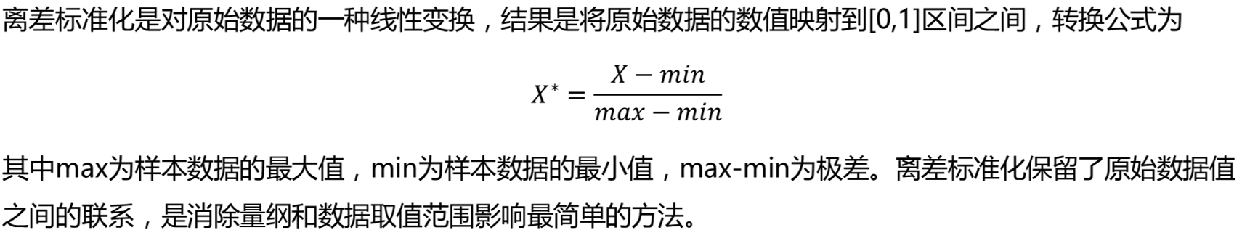

In [ ]:
#重新导入数据
detail1 = pd.read_csv('./detail.csv', index_col=0, encoding='gbk')

In [ ]:
## 自定义离差标准化函数
def MinMaxScale(data):
    data=(data-data.min())/(data.max()-data.min())
    return data
##对菜品订单表售价和销量做离差标准化
d1=MinMaxScale(detail1['counts'])
d2=MinMaxScale(detail1 ['amounts'])
d3=pd.concat([d1,d2],axis=1)
print('离差标准化之前销量和售价数据为：\n', detail1[['counts','amounts']].head())

In [ ]:
print('离差标准化之后销量和售价数据为：\n',d3.head())

数据的整体分布情况并不会随离差标准化而发生改变，原先取值较大的数据，在做完离差标准化后的值依旧较大。  
当数据和最小值相等的时候，通过离差标准化可以发现数据变为0。  
若数据极差过大就会出现数据在离差标准化后数据之间的差值非常小的情况。  
同时，还可以看出离差标准化的缺点：若数据集中某个数值很大，则离差标准化的值就会接近于0，并且相互之间差别不大。

### 2.2 标准差标准化数据
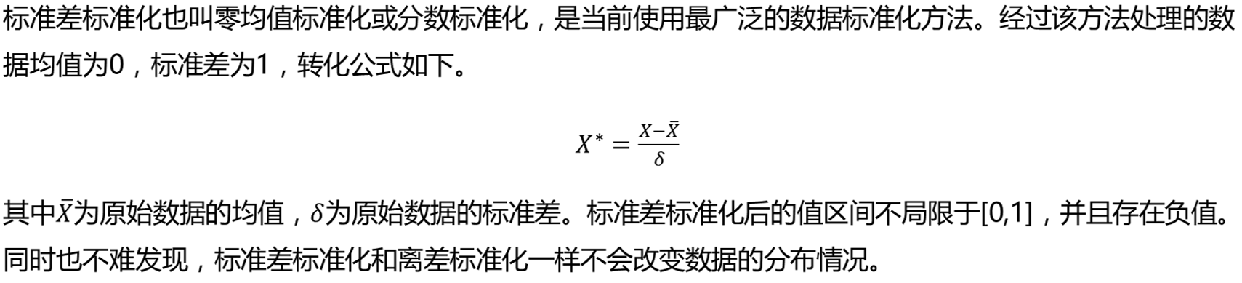

In [ ]:
##自定义标准差标准化函数
def StandardScaler(data):
    data=(data-data.mean())/data.std()
    return data
##对菜品订单表售价和销量做标准化
d4=StandardScaler(detail1['counts'])
d5=StandardScaler(detail1['amounts'])
d6=pd.concat([d4,d5],axis=1)
print('标准差标准化之前销量和售价数据为：\n', detail1[['counts','amounts']].head())

In [ ]:
print('标准差标准化之后销量和售价数据为：\n',d6.head())

通过比较离差标准化和标准差标准化两者的结果可以发现，标准差标准化后的值区间不局限于[0,1]，并且存在负值，但两种方法均不会改变数据的分布情况。

### 2.3 小数定标标准化数据
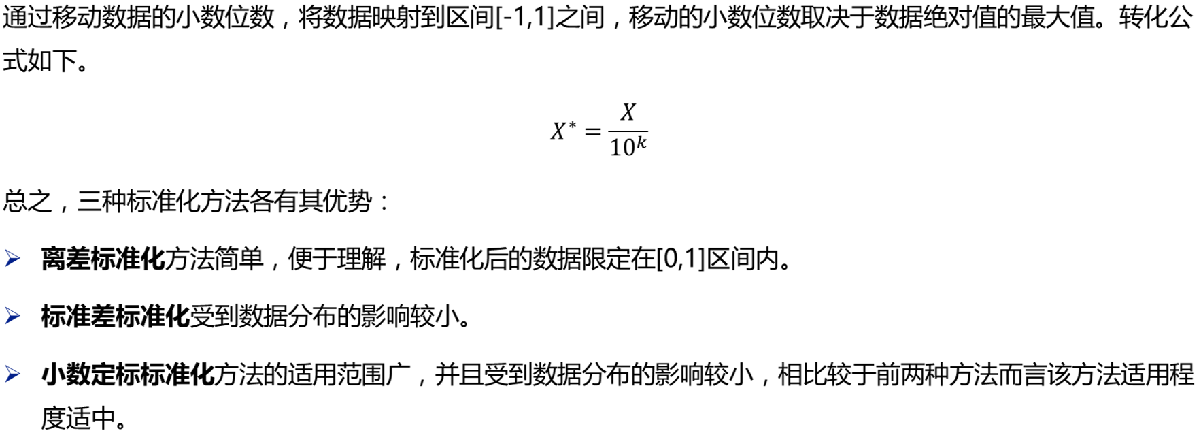

In [ ]:
##自定义小数定标差标准化函数
def DecimalScaler(data):
    data=data/10**np.ceil(np.log10(data.abs().max()))
    return data
##对菜品订单表售价和销量做标准化
d7=DecimalScaler(detail1['counts'])
d8=DecimalScaler(detail1['amounts'])
d9=pd.concat([d7,d8],axis=1)
print('小数定标标准化之前的销量和售价数据：\n',detail1[['counts','amounts']].head())

In [ ]:
print('小数定标标准化之后的销量和售价数据：\n',d9.head())